<a href="https://colab.research.google.com/github/PalmWS/Housing_Price_Prediction/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML Project/California Housing Prices/housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Drop missing value

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11276,-117.98,33.78,22.0,4255.0,971.0,2901.0,920.0,3.2636,<1H OCEAN,180200.0
12294,-116.93,33.93,13.0,7804.0,1594.0,3297.0,1469.0,2.0549,INLAND,95600.0
8152,-118.10,33.81,36.0,856.0,146.0,451.0,164.0,5.1993,<1H OCEAN,246000.0
11742,-121.15,38.91,23.0,1654.0,299.0,787.0,299.0,4.2723,INLAND,193100.0
20174,-119.17,34.31,21.0,259.0,38.0,142.0,45.0,5.2681,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
8031,-118.13,33.84,46.0,2439.0,429.0,944.0,374.0,4.2841,<1H OCEAN,312400.0
2782,-114.66,32.74,17.0,1388.0,386.0,775.0,320.0,1.2049,INLAND,44000.0
12940,-121.25,38.64,21.0,2764.0,363.0,902.0,360.0,5.6864,INLAND,258700.0
4096,-118.41,34.15,24.0,3891.0,866.0,1568.0,830.0,4.1656,<1H OCEAN,364700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

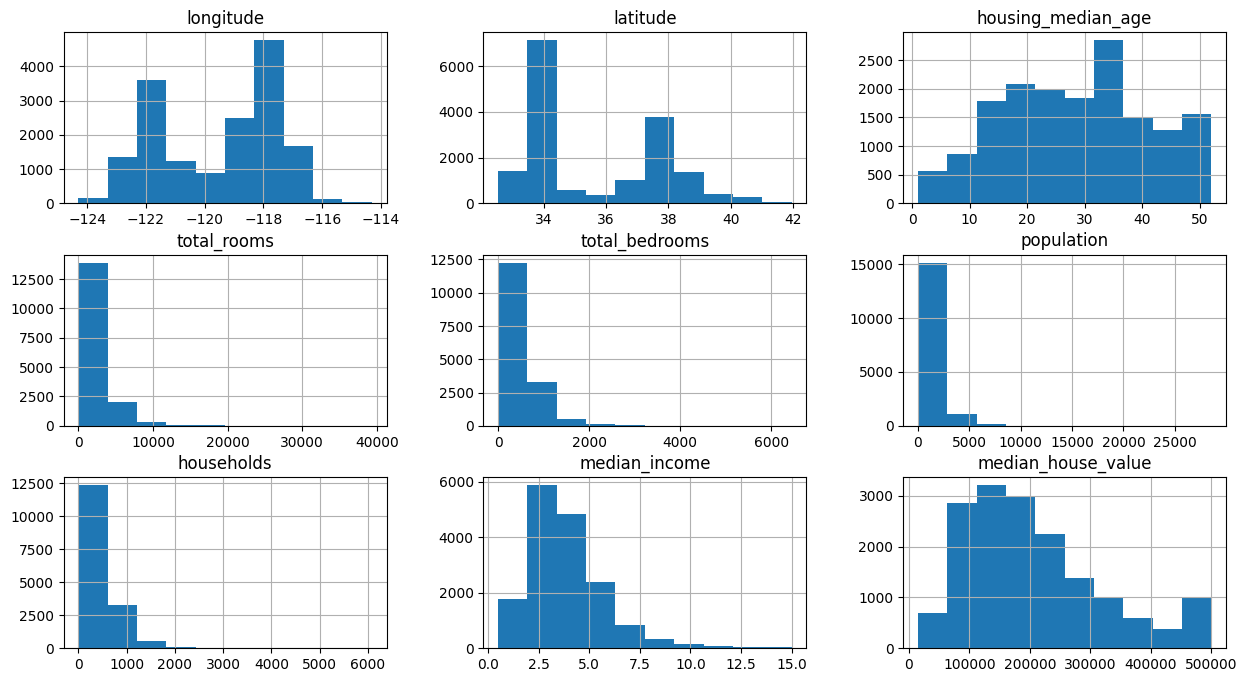

In [ ]:
train_data.hist(figsize=(15,8))

<ipython-input-31-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

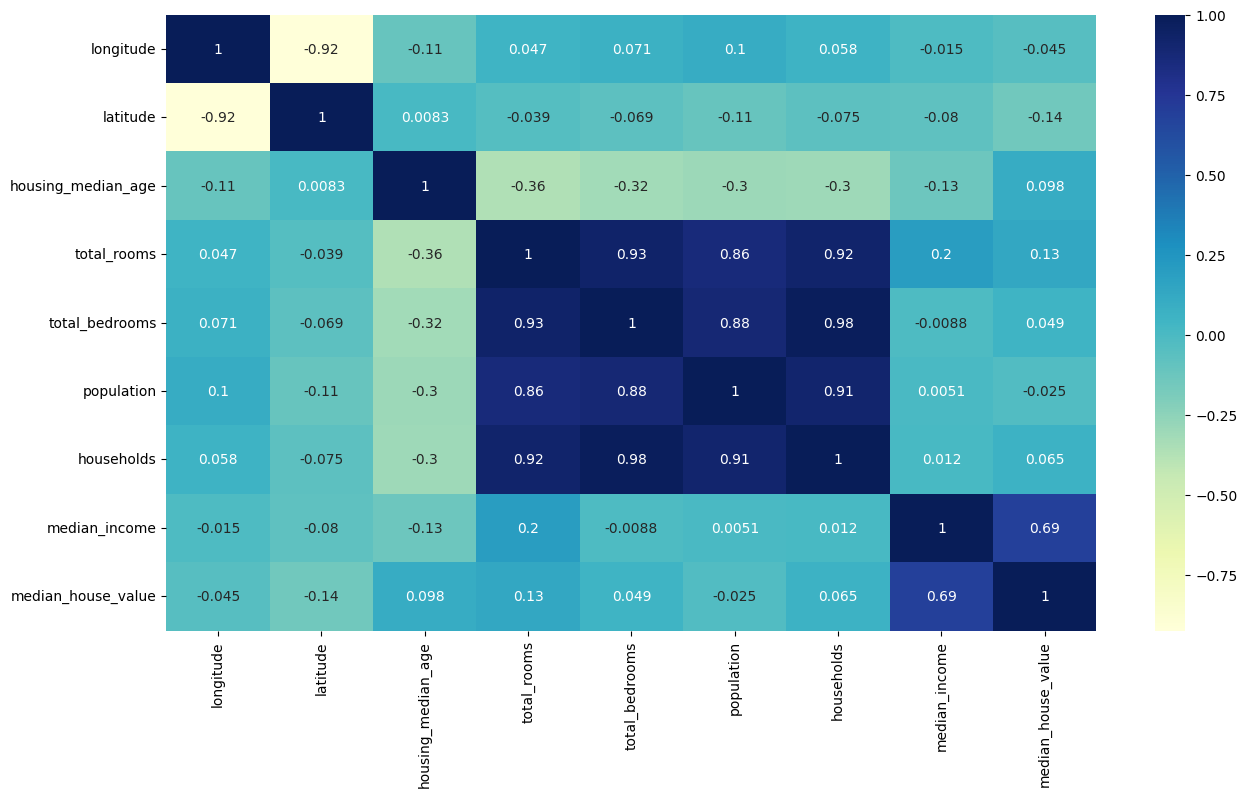

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
train_data['population'] = np.log(train_data['population'] + 1 )
train_data['households'] = np.log(train_data['households'] + 1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

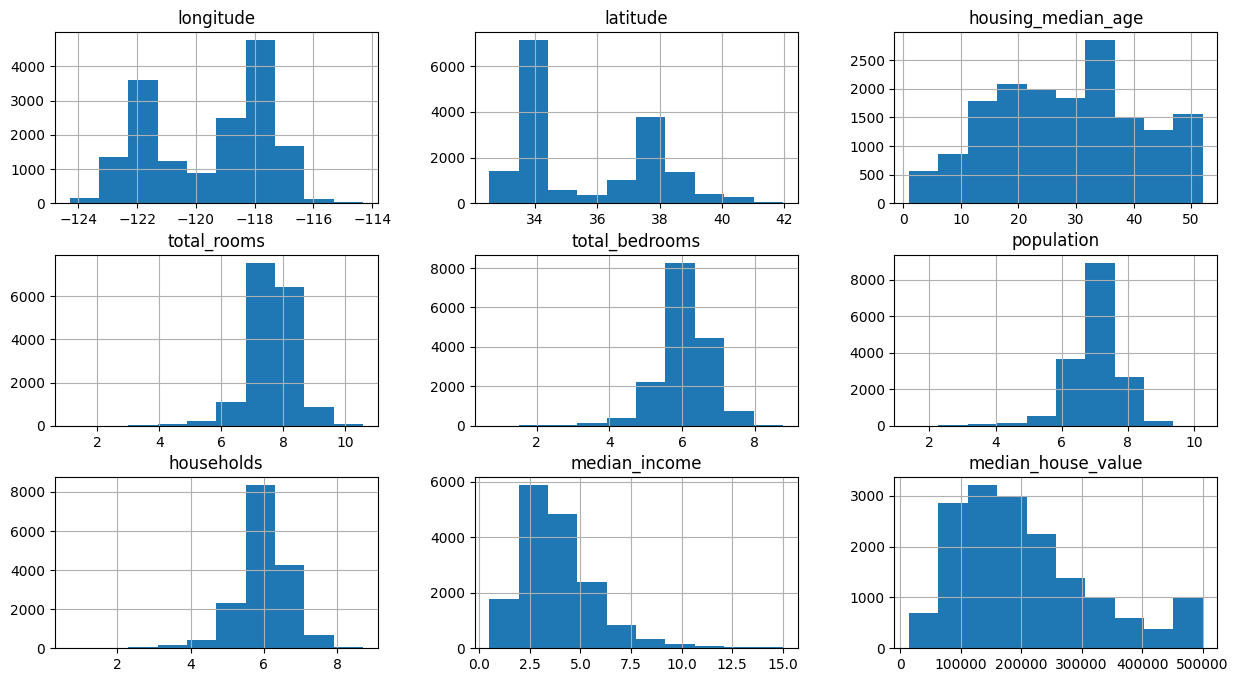

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7205
INLAND        5177
NEAR OCEAN    2127
NEAR BAY      1833
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'] , axis = 1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11276,-117.98,33.78,22.0,8.356085,6.879356,7.973155,6.825460,3.2636,180200.0,1,0,0,0,0
12294,-116.93,33.93,13.0,8.962520,7.374629,8.101072,7.293018,2.0549,95600.0,0,1,0,0,0
8152,-118.10,33.81,36.0,6.753438,4.990433,6.113682,5.105945,5.1993,246000.0,1,0,0,0,0
11742,-121.15,38.91,23.0,7.411556,5.703782,6.669498,5.703782,4.2723,193100.0,0,1,0,0,0
20174,-119.17,34.31,21.0,5.560682,3.663562,4.962845,3.828641,5.2681,500001.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8031,-118.13,33.84,46.0,7.799753,6.063785,6.851185,5.926926,4.2841,312400.0,1,0,0,0,0
2782,-114.66,32.74,17.0,7.236339,5.958425,6.654153,5.771441,1.2049,44000.0,0,1,0,0,0
12940,-121.25,38.64,21.0,7.924796,5.897154,6.805723,5.888878,5.6864,258700.0,0,1,0,0,0
4096,-118.41,34.15,24.0,8.266678,6.765039,7.358194,6.722630,4.1656,364700.0,1,0,0,0,0


<Axes: >

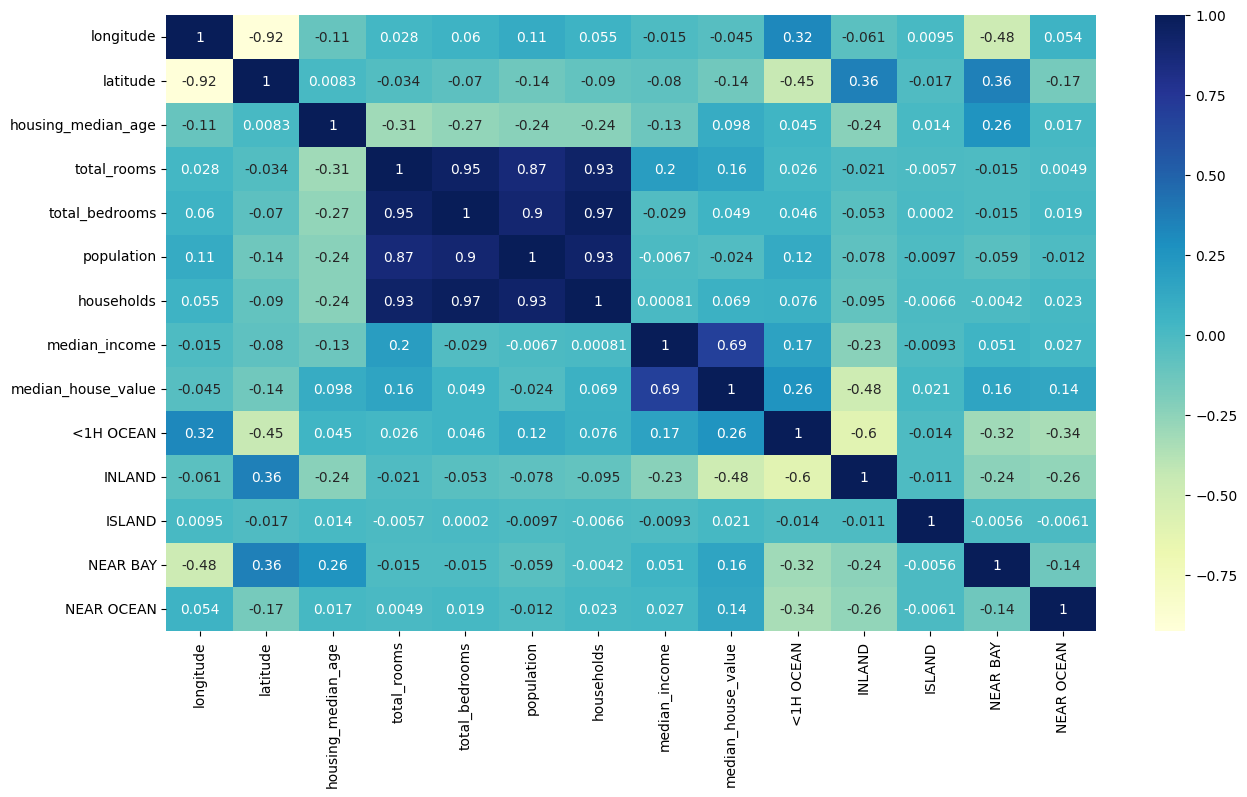

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

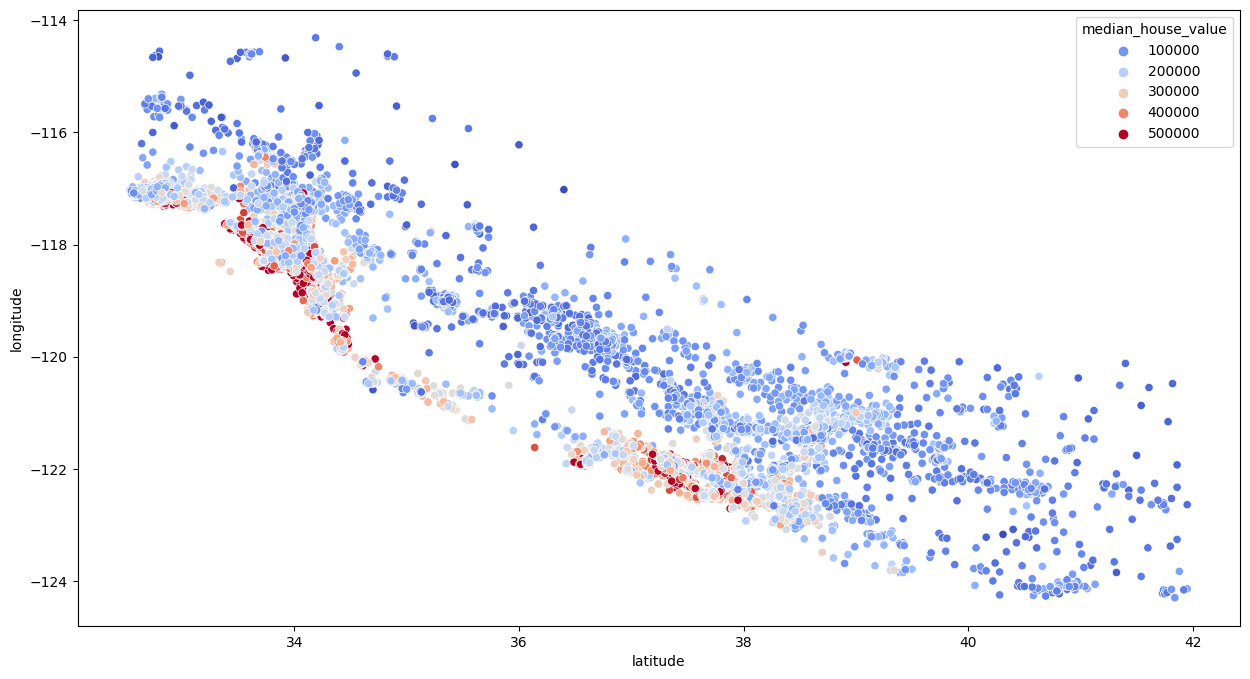

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

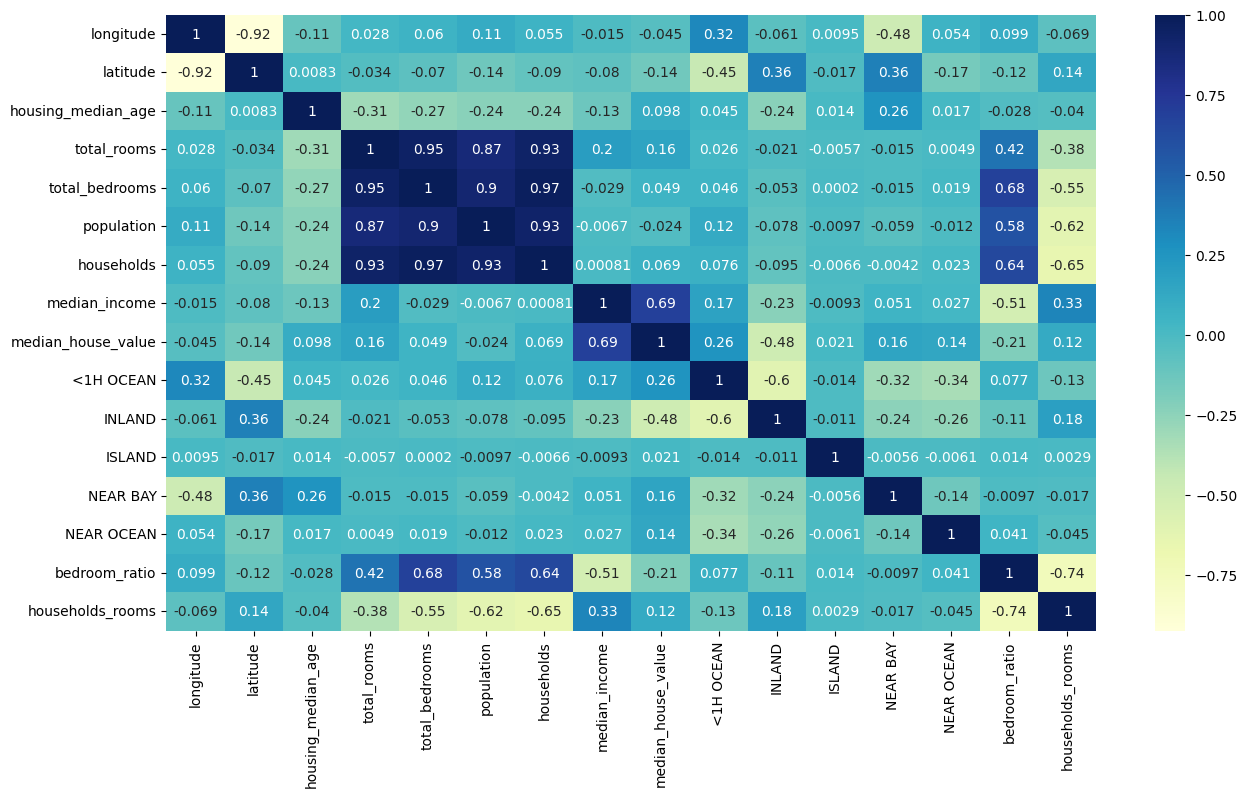

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s,y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(test_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'] , axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s,y_test)

0.6854074904953016

# Tuning with Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8301165004027347

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200 ,300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = "neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

0.826273525030282

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [ ]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.8317168845968713